In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sbn


In [2]:
data = pd.read_csv("D:\\Study\\Practice projects\\Graduate Admission\\Admission_Predict_Ver1.1.csv")


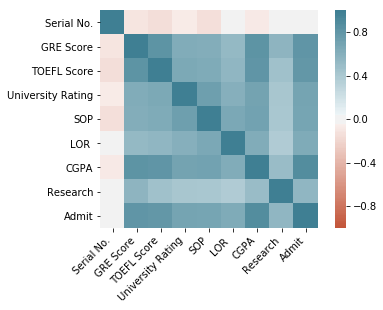

In [3]:
corr = data.corr()
ax = sbn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sbn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [4]:
print(corr)

                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.103839    -0.141696          -0.067641   
GRE Score           -0.103839   1.000000     0.827200           0.635376   
TOEFL Score         -0.141696   0.827200     1.000000           0.649799   
University Rating   -0.067641   0.635376     0.649799           1.000000   
SOP                 -0.137352   0.613498     0.644410           0.728024   
LOR                 -0.003694   0.524679     0.541563           0.608651   
CGPA                -0.074289   0.825878     0.810574           0.705254   
Research            -0.005332   0.563398     0.467012           0.427047   
Admit                0.008505   0.810351     0.792228           0.690132   

                        SOP      LOR       CGPA  Research     Admit  
Serial No.        -0.137352 -0.003694 -0.074289 -0.005332  0.008505  
GRE Score          0.613498  0.524679  0.825878  0.563398  0.810351  
TOEFL Score        0.644410  

In [5]:
yData = data.loc[:,"Admit"]
xData = data.loc[:,"Serial No.":"Research"]


In [6]:
trainX,testX,trainY,testY = train_test_split(xData,yData,test_size=0.20)

In [7]:
print(testX.shape)

(100, 8)


In [8]:
print(trainX.shape)

(400, 8)


In [9]:
print(type(trainY))

<class 'pandas.core.series.Series'>


In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
prediction = model.predict(testX)

In [12]:
print(type(prediction))

<class 'numpy.ndarray'>


In [13]:
from sklearn.metrics import mean_squared_error,r2_score
RMSEScore = mean_squared_error(testY.values,prediction)
R2Score = r2_score(testY.values,prediction)
print(RMSEScore)
print(R2Score)

0.003949306317931034
0.7950558626430173


In [14]:
print(trainX.shape)
print(trainY.shape)

(400, 8)
(400,)


In [15]:
from sklearn import svm
SVMModel = svm.SVR(kernel='linear')
SVMModel.fit(trainX,trainY)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
SVMPred = SVMModel.predict(testX)

In [17]:
SVMRMSEScore = mean_squared_error(testY.values,SVMPred)
SVMR2Score = r2_score(testY.values,SVMPred)
print(SVMRMSEScore)
print(SVMR2Score)

0.005576391968676038
0.7106203597335965


In [18]:
SVMModel = svm.SVR(kernel='rbf')
SVMModel.fit(trainX,trainY)

C:\Users\Prarthana\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
SVMPred = SVMModel.predict(testX)
SVMRMSEScore = mean_squared_error(testY.values,SVMPred)
SVMR2Score = r2_score(testY.values,SVMPred)
print(SVMRMSEScore)
print(SVMR2Score)

0.017017265729514015
0.11691103086253485


In [20]:
#SVMModel = svm.SVR(kernel='poly')
#SVMModel.fit(trainX,trainY)

In [21]:
#SVMPred = SVMModel.predict(testX)
#SVMRMSEScore = mean_squared_error(testY.values,SVMPred)
#SVMR2Score = r2_score(testY.values,SVMPred)
#print(SVMRMSEScore)
#print(SVMR2Score)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
KNNModel = KNeighborsRegressor()
KNNModel.fit(trainX,trainY)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [25]:
KNNPred = KNNModel.predict(testX)

In [27]:
KNNRMSEScore = mean_squared_error(testY.values,KNNPred)
KNNR2Score = r2_score(testY.values,KNNPred)
print(KNNRMSEScore)
print(KNNR2Score)

0.006063240000000001
0.685356011574372


In [ ]:
#try above modelling approach with more correlated signals only
#try tweaking parameters
KNNModel.summary()